
 <h1><center>Projet 1 : Analyse de sentiments</center></h1>
 

# Introduction : 

L’analyse des sentiments est un domaine de recherche en Traitement Automatique du Langage (NLP : Natural Language Processing) qui essaie de définir les opinions, sentiments et attitudes présentent dans un texte. Il est apparu depuis les années 2000 et particulièrement utilisé en Marketing pour sonder l’opinion public sur un produit.

Notre projet consiste à extraire le type de sentiment ; positif, négatif ou neutre ; dominant dans un ensemble de données et ceci en attribuant à chaque mot un poids (1 pour positif, -1 pour négatif et 0 pour neutre) pour enfin calculer le poids général du texte.



# Traitement du langage naturel NLP :

## Définition :

Le traitement du langage naturel (NLP) est la capacité d'un programme informatique à comprendre le langage humain tel qu'il est parlé. La NLP est une composante de l'intelligence artificielle (IA).

La syntaxe et l'analyse sémantique sont deux techniques principales utilisées avec le traitement du langage naturel. La syntaxe est la disposition des mots dans une phrase pour donner un sens grammatical. La NLP utilise la syntaxe pour évaluer le sens basé sur des règles grammaticales.

La sémantique implique l'utilisation et la signification des mots. La NLP applique des algorithmes pour comprendre le sens et la structure des phrases.


## Applications de NLP : 

**Sentiment analysis :** L'analyse des sentiments est un des cas d'utilisation principal de la NLP. À l'aide de l'analyse des sentiments, les scientifiques des données peuvent évaluer les commentaires sur les réseaux sociaux pour voir les performances de la marque de leur entreprise, par exemple, ou consulter les notes des équipes du service client pour identifier les domaines dans lesquels les gens souhaitent que l'entreprise fonctionne mieux.

**Topic modeling :** La modélisation de sujet est une technique qui permet de détecter les modèles de mots et d'expressions que contient un document et de regrouper automatiquement les groupes de mots et les expressions similaires qui le caractérisent le mieux.

**Text Generation :** La génération de texte est un sous-domaine du traitement du langage naturel. Il tire parti des connaissances en linguistique informatique pour générer automatiquement des textes en langage naturel, qui peuvent satisfaire certaines exigences de communication.

# Réalisation du projet :

## Outils utilisés :

1. **Collecte des données (Web Scraping) :** BeautifulSoup, Requests.
2. **Nettoyage des données :** String, stop_words, stop_tokenize.

## Collecte de données :

**Définiton du Web Scraping :**

Le Web Scraping est un terme qui décrit l'utilisation d'un programme ou d'un algorithme pour extraire et traiter de grandes quantités de données à partir du Web. Dans le cas où il n’y a pas de moyen direct pour télécharger des données à partir du Web, le Web Scraping à l'aide de Python est une compétence utilisée pour extraire les données sous une forme utile qui peut être importée.

Dans le cadre de ce projet, nos données viennent du célèbre site des paroles des chansons **genius.com**

## Nettoyage des données :

Lorsqu'il s'agit de données numériques, le nettoyage des données implique souvent la suppression des valeurs nulles et des données en double, le traitement des valeurs aberrantes, etc. Avec les données textuelles, il existe des techniques courantes de nettoyage des données, également appelées techniques de prétraitement de texte.

**Étapes de nettoyage des données :**
* Mettre le texte en minuscules
* Supprimer la ponctuation
* Supprimer les valeurs numériques
* Supprimer les retours à la ligne, tabulations …
* Diviser le texte en mots
* Supprimer les mots vides ( qui n’ont pas de sens, exemple : à, et, le …)


## Sauvegarde et traitement des données :

Après les phases de récupération et du nettoyage, on a procède à la sauvegarde de nos données dans des fichiers pour une utilisation ultérieure.
Il était aussi indispensable d'avoir une base de mots positifs et négatifs qu'on a collecté nous même pour enfin pouvoir calculer le poids d'un texte.


## Code :

In [2]:
import string
import requests
from bs4 import BeautifulSoup
from bs4.element import Tag, NavigableString
import os
from pathlib import Path
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

mots_positifs = open("positif_words.txt", encoding='utf-8').read().lower() \
.translate(str.maketrans('', '', string.punctuation + '\t')) \
.split()

mots_negatifs = open("negatif_words.txt", encoding='utf-8').read().lower() \
.translate(str.maketrans('', '', string.punctuation + '\t')) \
.split()


def rechercher_page(url):
    while True :
        texte_html = requests.get(url).text
        soup = BeautifulSoup(texte_html, "lxml")
        if soup.find("div", {"id": "application"})!=None: return soup

def recuperer_paroles(soup):
    lignes = []
    for div in soup.find_all(class_="Lyrics__Container-sc-1ynbvzw-2"):
        for element in div:
            span = element.find("span")
            if span not in [-1, None]:
                lignes += [ str(e) for e in span if type(e)==NavigableString ]
            elif type(element)!= Tag : lignes += [str(element)]
    return lignes


def sauvegarder_donnees(url):
    soup = rechercher_page(url)
    liste_paroles = recuperer_paroles(soup)

    titre   = soup.find(class_="SongHeader__Title-sc-1b7aqpg-7").text.strip()
    artiste = soup.find(class_="SongHeader__Artist-sc-1b7aqpg-8").text.strip()

    if not os.path.exists("Chansons/"+artiste): os.mkdir("Chansons/"+artiste)

    with open( "Chansons/"+artiste+"/"+titre+".txt", 'w+', encoding="utf-8") as fichier:
        for ligne in liste_paroles : fichier.write(ligne+"\n")
    print( artiste+"/"+titre+".txt créé.")
    return artiste+"/"+titre


#Cleaning Data
def nettoyer_donnees(nomFichier) :
    texte = open("Chansons/"+nomFichier+".txt", encoding='utf-8').read().lower()
    texte_propre = texte.translate( str\
    .maketrans('’\n\t-',4*' ', string.punctuation + '…0123456789'+"«»"))
    mots = word_tokenize(texte_propre, "french")
    mots_utiles = [mot for mot in mots if mot not in stopwords.words("french")]
    return mots_utiles


def calculer_poids(nomFichier):
    poids = 0
    liste_mots = nettoyer_donnees(nomFichier)
    for mot in liste_mots:
        if mot in mots_positifs:
            poids += 1
        elif mot in mots_negatifs:
            poids -= 1

    if poids > 0:
        print(nomFichier+" est positif : Poids("+str(poids)+")\n")
    else:
        print(nomFichier+" est négatif : Poids("+str(poids)+")\n")


def traiter_target(separement=True):
    with open("targets.txt", "r", encoding="utf-8") as file:
        for lien in file:
            if len(lien)>1:
                target = sauvegarder_donnees(lien.strip())
                calculer_poids(target)

traiter_target()


Damso/60 années.txt créé.
Damso/60 années est positif : Poids(11)

Lara Fabian/Je suis malade.txt créé.
Lara Fabian/Je suis malade est négatif : Poids(-9)

Édith Piaf/La vie en rose.txt créé.
Édith Piaf/La vie en rose est positif : Poids(12)



## Problématique :

Dans la méthode ci-dessous, on ne prend pas en considération le contexte des mots, on les considère comme étant des entités séparées.
En conséquence, le résultat obtenu peut ne pas refléter le vrai sentiment du texte.

**Exemple :**
   * **Phrase 1**: C'est bien.
   * **Phrase 2**: Ce n'est pas bien.
   
Les deux phrases sont considérées comme positives car les mots autres que **bien** sont ignorés.

Pour remédier à ce problème on utilise une autre alternative basée sur le sens du mot selon son contexte.

    

## Alternative :

En ce qui concerne les données textuelles, il existe une technique populaire :

**Module TextBlob :** Les chercheurs en linguistique ont étiqueté le sentiment des mots en fonction de leur expertise dans le domaine. Le sentiment des mots peut varier en fonction de leur emplacement dans une phrase. Le module TextBlob nous permet de profiter de ces étiquettes.

Chaque mot d'un corpus (données) est étiqueté en termes de polarité et de subjectivité. Le sentiment d'un corpus est la moyenne de ceux-ci.

* **Polarité :** à quel point un mot est positif ou négatif. -1 est très négatif. +1 est très positif.
* **Subjectivité :** le degré de subjectivité ou d'opinion d'un mot. 0 est un fait. +1 est vraiment une opinion.


### Exemple :

In [3]:
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer

#Il est meilleure
phrase = "Il est meilleur"
print(phrase  +" : "+ str(TextBlob(phrase,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment))

#Il n'est pas meilleure
phrase = "Il n'est pas meilleur"
print(phrase  +" : "+ str(TextBlob(phrase,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment))

#Il est vraiment le meilleure
phrase = "Il est vraiment le meilleur"
print(phrase +" : "+ str(TextBlob(phrase,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment))

##La sortie est un couple qui contient respectivement la polarité et la subjectivité.

Il est meilleur : (0.53, 0.5)
Il n'est pas meilleur : (-0.265, 0.5)
Il est vraiment le meilleur : (1.0, 1.0)


## Application :

Dans la partie qui suit, on va appliquer la solution trouvée sur les données collectées précedemment tout en ajoutant une fonction qui permet de savoir l'évolution de la polarité dans nos chansons.

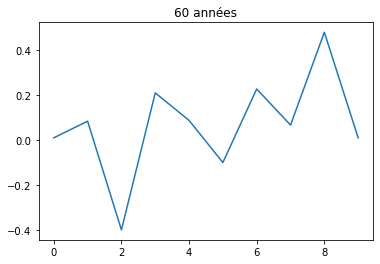

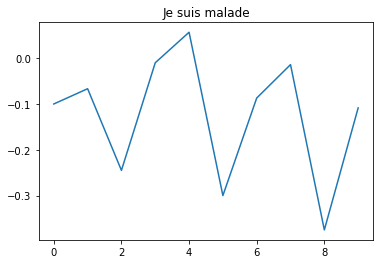

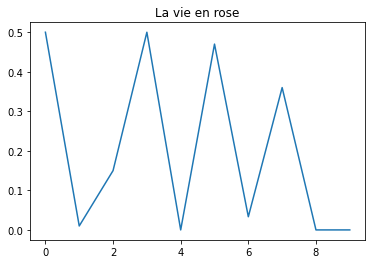

In [4]:
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer
import string
import matplotlib.pyplot as plt
import math
import numpy as np
import glob

def decouper_texte(texte, n=10):
    # Calculer la longueur du texte, la taille de chaque partie et la position de départ de celle ci.
    longueur = len(texte)
    taille = math.floor(longueur / n)
    depart = np.arange(0, longueur, taille)

    #Tirer des morceaux de texte de taille égale et les mettre dans une liste
    liste_decoupee = []
    for partie in range(n):
        liste_decoupee.append(texte[depart[partie]:depart[partie]+taille])
    return liste_decoupee

#On découpe le texte en 10 parties et on calcule pour chaque partie la polarité associée
#pour enfin dessiner l'evolution de la polarité dans le temps

for fichier in glob.glob("Chansons/**/*.txt",recursive=True) :
    texte = open( fichier, 'r', encoding="utf-8").read()
    parties = decouper_texte(texte)
    polarite_parties = []
    for p in parties:
        polarite_parties.append(TextBlob(p,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[0])
    nom= fichier.split("\\")
    nom_chanson =nom[2].split(".")
    plt.plot(polarite_parties)
    plt.title(nom_chanson[0])
    plt.show()

# Bonus :

Pour aller plus loin, on peut ne pas se restreindre à savoir si un mot est positif ou négatif pour en extraire l'émotion qu'il représente : joie, tristesse, dégout, colère ...

Dans ce sens, on a collecté les mots associés à chaque émotion, compter l'occurence de l'émotion dans les chansons pour savoir les émotions dominantes.


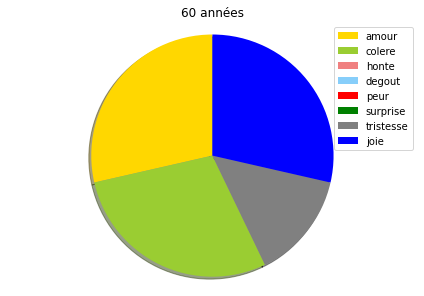

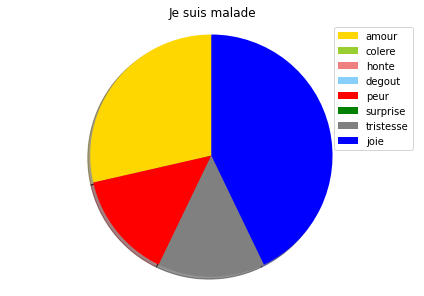

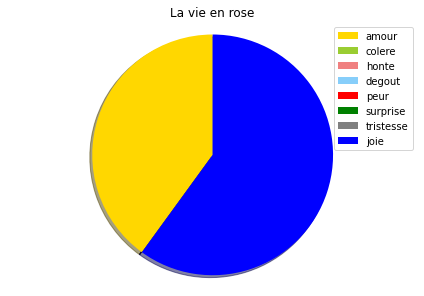

In [5]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def nettoyer_donnees(nomFichier) :
    texte = open(nomFichier, encoding='utf-8').read().lower()
    texte_propre = texte.translate( str\
    .maketrans('’\n\t-',4*' ', string.punctuation + '…0123456789'+"«»"))
    mots = word_tokenize(texte_propre, "french")
    mots_utiles = [mot for mot in mots if mot not in stopwords.words("french")]
    return mots_utiles


def Emotions_Extraction(donnees) :
    emotions = {"amour":0,"colere":0,"honte":0,"degout":0,"peur":0,"surprise":0,"tristesse":0,"joie":0}
    for emotion in emotions :
        with open('emotions/'+ emotion +'.txt',encoding="utf-8") as fichier :
            for mot in fichier :
                mot = mot.replace('\n','')
                if mot in donnees :
                    emotions[emotion]+=1
    return emotions


def Emotions_Representation(emotions,nomChanson) :
    couleurs = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','green','gray',"blue"]
    patchs, textes = plt.pie(list(emotions.values()), colors=couleurs, shadow=True, startangle=90)
    plt.legend(patchs, list(emotions.keys()), loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.title(nomChanson)
    plt.show()


for fichier in glob.glob("Chansons/**/*.txt",recursive=True) :
    texte_nettoye = nettoyer_donnees(fichier)
    nom= fichier.split("\\")
    nom_chanson =nom[2].split(".")
    Emotions_Representation(Emotions_Extraction(texte_nettoye),nom_chanson[0])


# Conclusion :


L’importance de l’analyse des sentiments est présente dans plusieurs domaines ainsi plusieurs applications ont vu le jour dans ce contexte spécialement dans l’aide à la décision. C'est une discipline en expansion vu le besoin permanent de savoir l'avis, opinions et sentiments des personnes vis à vis des produits, services, sujets politiques ...

<div style= "float: right;"><h2><b>Réalisé par : </h2><h3><b/>Mediane Jawad <br/> Oqaidi Oum keltoum <br/> Soulkane Siham </h3></div>
    